# Text Analytics HW1
Billy Yuan, Nikita Lakhotia, Stuti Madaan, Tyler Nicholas, Wenduo Wang

### Import packages and set up data

In [1]:
from collections import Counter
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nltk import pos_tag, word_tokenize, NaiveBayesClassifier, classify, bigrams
from nltk.corpus import stopwords as stpwds
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.metrics import ConfusionMatrix
from sklearn.cross_validation import train_test_split

lmtz = WordNetLemmatizer().lemmatize

In [2]:
# Helper function to tokenize 
regex_tok = RegexpTokenizer(r"[\w]+")

In [3]:
# Read data
data = pd.read_csv("Train_rev1.csv", usecols=["FullDescription", "SalaryNormalized"])

In [4]:
# Create series of only the job descriptions
job_description = data.FullDescription

In [5]:
# Calculate 75th percentile salary and store this value
salary_75_percentile = np.percentile(data.SalaryNormalized.tolist(),75)
print salary_75_percentile

42500.0


In [6]:
# Create target column
def over_75(salary):
    if salary >= salary_75_percentile:
        return "high"
    else:
        return "low"

data['target'] = data['SalaryNormalized'].map(over_75)

In [7]:
# Create list of tokenized words
tokenized = [regex_tok.tokenize(job_description[i].decode('utf-8')) for i in xrange(len(job_description))]

In [8]:
def bigram_features(job_desc):
    text = word_tokenize(job_desc)
    bi_text = bigrams(text)
    pos_text = pos_tag(text)
    new_list = []
    for item in pos_text:
        item = item[1]
        new_list.append(item)
    bi_text = bigrams(new_list)
    bigram_counter = Counter(bi_text)
    token_counter = Counter(text)
    for item in bigram_counter:
        token_counter[item] = bigram_counter[item]
    return dict(token_counter)

In [9]:
def data_refine(job_desc, process_type):
    lmtzi = lmtz
    # Remove stop words
    if process_type == "remove_stop":
        no_stop_words_list = []
        stopwords = stpwds.words('english')
        for item in tokenized[:len(job_desc)]:
            # stopwords = stopwords.words('english')
            content = [w for w in item if w.lower() not in stopwords]
            no_stop_words_list.append(Counter(content)) # word count dict of every job desc. without stopwords
        # Create feature list (list of tuples)
        no_stop_features = [(dict(no_stop_words_list[i]),data['target'][i]) for i in xrange(len(job_desc))]
        
        return no_stop_features
    
    elif process_type == "lem":
        # tokenized list after lemmatization. The freq. counts of this will be our features
        lem_list= []
        for item in tokenized[:len(job_desc)]: # debug
            lemmatized_words = [lmtzi(word) for word in item]
#             lemmatized_words = []
#             for word in item:
#                 lemmatized_words.append((lmtzi(word)))
            lem_list.append(lemmatized_words)
        
        lem_features = [(dict(Counter(lem_list[i])),data['target'][i]) for i in xrange(len(job_desc))]
        
        return lem_features

    elif process_type == "bigram":
        bigram_list = []
        for i in xrange(len(job_desc)):
            bigram_list.append((bigram_features(" ".join(tokenized[i])),data['target'][i]))
        return bigram_list
    else:
        return [(dict(Counter(tokenized[i])),data['target'][i]) for i in xrange(len(tokenized))]
    

## Part A

### A1
_What are the top 5 parts of speech in this corpus of job descriptions? How frequently do they
appear?_

The top 5 parts of speech and their frequencies are:

1. Noun, singular or mass - 11,041,536
2. Proper noun, singular = 8,808,952
3. Preposition or subordinating conjunction - 6,374,096
4. Adjective - 5,130,847
5. Determiner - 4,903,941

In [11]:
pos_token = [pos_tag(tokenized[i]) for i in xrange(len(tokenized))]
a1_list = []
for item in pos_token:
    help_list = []
    for tup_1 in item:
        help_list.append(tup_1[1])
    a1_list.append(Counter(help_list))

In [12]:
del pos_token
most_common_pos = a1_list[0]

In [13]:
for i in xrange(1,len(a1_list)):
    most_common_pos += a1_list[i]

del a1_list
most_common_pos.most_common()[:5]

[('NN', 11041536),
 ('NNP', 8808952),
 ('IN', 6374096),
 ('JJ', 5130847),
 ('DT', 4903941)]

In [14]:
del most_common_pos

### A2
_Does this corpus support Zipf’s law? Plot the most common 100 words in the corpus against the
theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform
stemming or lemmatization._

Yes, this corpus supports Zipf's law. A word's rank in the corpus and its frequency are inversely related. The list of the top 100 most common words and the rank-frequency graph are below.

In [10]:
tokenized_all = []
for item in tokenized: 
    tokenized_all += item

and: 2640417
to: 1871409
the: 1747563
of: 1417820
a: 1412751
in: 980680
for: 825230
with: 709641
will: 647451
be: 603152
is: 595401
you: 475113
as: 414395
an: 411569
are: 410015
on: 387286
have: 339114
experience: 329950
or: 322853
The: 317014
this: 274403
role: 258797
work: 253994
your: 250511
team: 237632
This: 220844
You: 214257
within: 214176
all: 198903
that: 198870
skills: 198837
business: 198488
working: 184955
their: 179881
client: 175619
at: 162915
from: 159536
our: 158519
Manager: 154720
looking: 152332
s: 144243
company: 138680
To: 136291
management: 136032
opportunity: 125776
development: 124697
sales: 122578
required: 121460
we: 120466
support: 116445
new: 116317
We: 116081
job: 115120
who: 114461
UK: 113788
please: 110582
A: 108065
successful: 108023
by: 106748
service: 104221
must: 97273
based: 97153
excellent: 95735
Experience: 93649
join: 92111
customer: 91543
environment: 90057
including: 89282
has: 88585
www: 87480
com: 87110
knowledge: 86066
apply: 85711
not: 85439


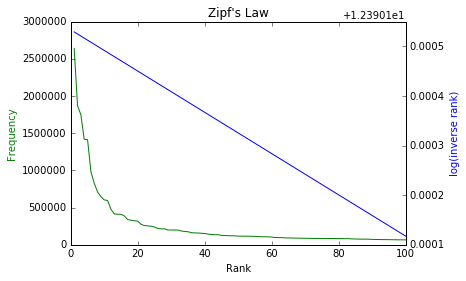

In [16]:
top_100_words = Counter(tokenized_all).most_common()[:100]
word_list = [word[0] for word in top_100_words]
freq_list = [word[1] for word in top_100_words]
rank_list = [i for i in xrange(1,len(top_100_words)+1)]
log_rev_rank = map(math.log, range(1, len(Counter(tokenized_all))+1)[::-1])
for i in xrange(len(top_100_words)):
    print "{}: {}".format(word_list[i],freq_list[i])
    
del top_100_words

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(rank_list[:100], freq_list[:100], color="g")
ax2.plot(rank_list[:100], log_rev_rank[:100], color="b")
ax1.set_xlabel("Rank")
ax1.set_ylabel("Frequency", color="g")
ax2.set_ylabel("log(inverse rank)", color="b")
plt.title("Zipf's Law")

del word_list, freq_list, rank_list, log_rev_rank

### A3
_If we remove stopwords and lemmatize the corpus, what are the 10 most common words? What is
their frequency?_

The top 10 most common words and their frequencies are:

1. experience - 431,323
2. role - 313,012
3. team - 302,115
4. work - 291,955
5. client - 286,690
6. business - 276,559
7. service - 244,243
8. skill - 242,526
9. manager - 217,339
10. sale - 212,460


In [11]:
stopwords = stpwds.words('english')
tokenized_no_stop = [word.lower() for word in tokenized_all if word not in stopwords]

In [12]:
lem_words = [lmtz(word) for word in tokenized_no_stop]
Counter(lem_words).most_common()[:15] 

[(u'experience', 431323),
 (u'the', 332745),
 (u'role', 313012),
 (u'team', 302115),
 (u'work', 291955),
 (u'client', 286690),
 (u'business', 276559),
 (u'service', 244243),
 (u'skill', 242526),
 (u'working', 222876),
 (u'this', 222564),
 (u'you', 218927),
 (u'manager', 217461),
 (u'within', 217339),
 (u'sale', 212460)]

In [18]:
del tokenized_all, lem_words

## Part B

We chose to use a multinomial Naive Bayes model for this section.

### B1
_Create a classification model with all words and the bag-of-words approach. How accurate is the
model (show the confusion matrix)?_

Using the bag-of-words approach, our model had an accuracy of 0.7524. The confusion matrix is below. The columns of the confusion matrix are the "actual" categories while the rows are what the model predicted.

In [19]:
b1_features = data_refine(job_description,"none") # create features
train_set_b1, test_set_b1 = train_test_split(b1_features, test_size = 0.3, random_state=128) # create test/train
del b1_features
classifier_b1 = NaiveBayesClassifier.train(train_set_b1)
del train_set_b1

In [20]:
print("Accuracy with Bag of Words: {}".format(classify.accuracy(classifier_b1, test_set_b1)))

Accuracy with Bag of Words: 0.752447876238


In [21]:
# Build lists for predictions and actuals for confusion matrix
predict_b1 = [classifier_b1.classify(test_set_b1[i][0]) for i in xrange(len(test_set_b1))]
actual_b1 = [test_set_b1[i][1] for i in xrange(len(test_set_b1))] 
del test_set_b1

In [22]:
print ConfusionMatrix(predict_b1,actual_b1)
del predict_b1, actual_b1

     |     h       |
     |     i     l |
     |     g     o |
     |     h     w |
-----+-------------+
high |<16574>16156 |
 low |  2022<38679>|
-----+-------------+
(row = reference; col = test)



### B2
_Speculate before running the following analysis whether lemmatization would help improve the
accuracy of classification. Now create a classification model after lemmatization. Did the classification
accuracy increase relative to B1? Comment on your speculation versus the actual results you obtained._

Prior to running the model with lemmatization, we expected that lemmatization would increase the accuracy of the model. However, after running the model, lemmatization did not appear to improve the accuracy of our model. We suspect that the accuracy did not increase because the posterior probabilities after lemmatization did not change much.

In [23]:
b2_features = data_refine(job_description,"lem")
train_set_b2, test_set_b2 = train_test_split(b2_features, test_size = 0.3, random_state=128)
del b2_features
classifier_b2 = NaiveBayesClassifier.train(train_set_b2)
del train_set_b2

In [24]:
print("Accuracy with lemmatization: {}".format(classify.accuracy(classifier_b2, test_set_b2)))
del test_set_b2

Accuracy with lemmatization: 0.751957620079


### B3
_Now speculate whether stopwords removal from the original data would help increase the accuracy
of the model. Take out the stopwords (but do not lemmatize), build a classification model and check the
accuracy, and compare with that in B1 & B2._

_Also show the top 10 words (excluding stopwords) that are most indicative of (i) high salary, and (ii) low
salary._

After seeing how little lemmatization improved accuracy, we did not expect the removal of stop words to improve accuracy either since we hypothesized that stop words provided little predictive value. The results of our model with stop words removed confirm our hypothesis - the accuracy did not improve.

**Top 10 Words Most Indicative of 'High' Salary Jobs:**
1. Architect
2. GP
3. LHB
4. locum
5. Latency
6. actuary
7. Braga
8. Lisbon
9. Swaps
10. Lipman

**Top 10 Words Most Indicative of 'Low' Salary Jobs:**
1. dusting
2. vacuuming
3. photocopying
4. Cleaner
5. Teach
6. NVQ
7. Setter
8. unloading
9. LGV
10. Fanuc

In [25]:
b3_features = data_refine(job_description, "remove_stop")
train_set_b3, test_set_b3 = train_test_split(b3_features, test_size = 0.3, random_state=128)
del b3_features
classifier_b3 = NaiveBayesClassifier.train(train_set_b3)
del train_set_b3

In [26]:
print("Accuracy with stopwords removal: {}".format(classify.accuracy(classifier_b3, test_set_b3)))
del test_set_b3

Accuracy with stopwords removal: 0.748947991992


In [27]:
most_important_features_b3 = classifier_b3.show_most_informative_features(30)

# We were not sure how to show only the top 10 words for both low and high.
print most_important_features_b3

Most Informative Features
               Architect = 5                high : low    =    165.2 : 1.0
                      GP = 5                high : low    =     96.8 : 1.0
               Architect = 4                high : low    =     94.3 : 1.0
                 dusting = 1                 low : high   =     91.9 : 1.0
                     LHB = 1                high : low    =     87.0 : 1.0
               vacuuming = 1                 low : high   =     80.6 : 1.0
                   Merco = 5                high : low    =     75.3 : 1.0
                   locum = 3                high : low    =     74.6 : 1.0
            photocopying = 1                 low : high   =     72.8 : 1.0
                 Latency = 1                high : low    =     71.4 : 1.0
                 actuary = 1                high : low    =     67.5 : 1.0
                   Braga = 1                high : low    =     65.5 : 1.0
                  Lisbon = 1                high : low    =     65.5 : 1.0

### B4
_Use the job descriptions without lemmatiztion and stopword removal. Add parts-of-speech bigrams
to the bag-of-words, and run a new classification model. Does the accuracy increase over the results in
B1?_

Before answering this question, we will show what our feature list looked like. Based on how we interpreted the question, our features list looked like:

```python
# w = word
# target = low or high

features = [({w1 : freq1, w2 : freq2, ... , w : freq, pos_bigram1 : freq1, pos_bigram2: freq2...}, target), ...]
```

After adding parts-of-speech bigrams to the bag-of-words, the accuracy did not improve.

In [28]:
b4_features = data_refine(job_description, "bigram")
del job_description
train_set_b4, test_set_b4 = train_test_split(b4_features, test_size = 0.3, random_state=128)
del b4_features
classifier_b4 = NaiveBayesClassifier.train(train_set_b4)
del train_set_b4

In [29]:
print("Accuracy with adding POS bigrams: {}".format(classify.accuracy(classifier_b4, test_set_b4)))
del test_set_b4

Accuracy with adding POS bigrams: 0.751875910719
